# 用最少数量的箭引爆气球

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/minimum-number-of-arrows-to-burst-balloons/**

## 一、题目

在二维空间中有许多球形的气球。对于每个气球，提供的输入是水平方向上，气球直径的开始和结束坐标。由于它是水平的，所以y坐标并不重要，因此只要知道开始和结束的x坐标就足够了。开始坐标总是小于结束坐标。平面内最多存在104个气球。

一支弓箭可以沿着x轴从不同点完全垂直地射出。在坐标x处射出一支箭，若有一个气球的直径的开始和结束坐标为 xstart，xend， 且满足  xstart ≤ x ≤ xend，则该气球会被引爆。可以射出的弓箭的数量没有限制。 弓箭一旦被射出之后，可以无限地前进。我们想找到使得所有气球全部被引爆，所需的弓箭的最小数量。

## 二、示例

输入:

[[10,16], [2,8], [1,6], [7,12]]

输出:

2

## 三、解题思路

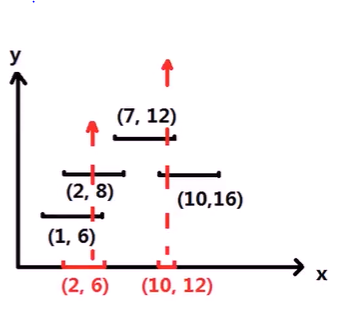

如上图，我们不需要考虑高度，只需要考虑宽度就可以。

我们可以思考：

- 只有一个气球，则需要一个弓箭手
- 有两个气球，有重叠需要一个弓箭手，没有重叠则需要两个弓箭手
- 有三个气球，没有重叠需要三个弓箭手，两两重叠（有两个重叠，1-2，2-3），需要两个弓箭手，三个都有重叠部分（有三个重叠1-2，2-3，1-3），则只需要一个弓箭手

### 贪心

#### 贪心规律

- 对于某个气球至少需要一只弓箭将其击穿
- 在这只气球将其击穿的同时，尽可能击穿其他更多的气球

#### 算法思路

- 对各个气球进行排序，按照气球的左端点从小到大排
- 遍历气球数组，并维护一个射击区间，在满足击穿当前气球的情况下，尽可能多的击穿气球，每击穿一个新气球，更新一次射击区间，以保证新气球也被击穿
- 如果没办法击穿新气球则，增加一个弓箭手，并维护一个新的射击区间

In [1]:
def findMinArrowShots(points):
    if len(points) < 2:
        return len(points)
    # 排序数组，按左端点排
    points = sorted(points, key=lambda x: x[0])
    # 初始化弓箭手的数量为1
    shooter = 1
    # 初始化射击区间，即第一个气球两端点
    shoot_begin = points[0][0]
    shoot_end = points[0][-1]
    for point in points:
        # 当射击区间的右端点在当前气球的最边缘后面或者相等时，可以缩小射击区间来击穿这个气球
        if shoot_end >= point[0]:
            # 由左端点，来确保可以达到气球
            shoot_begin = point[0]
            # 如果气球的右端点更考前，则向前移动右端点以确保在区间内都能打爆
            if shoot_end > point[-1]:
                shoot_end = point[-1]
        else:
            # 区间调整也不能打爆这个气球，则增加个弓箭手，并更新射击区间为当前气球
            shooter += 1
            shoot_begin = point[0]
            shoot_end = point[-1]
    return shooter

In [2]:
findMinArrowShots([[10,16], [2,8], [1,6], [7,12]])

2